<a href="https://colab.research.google.com/github/EdithPraiselin/BUILD-A-CONVOLUTIONAL-NEURAL-NETWORK-CNN-FOR-IMAGE-CLASSIFICATION-USING-TENSORFLOW-OR-PYTORCH/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

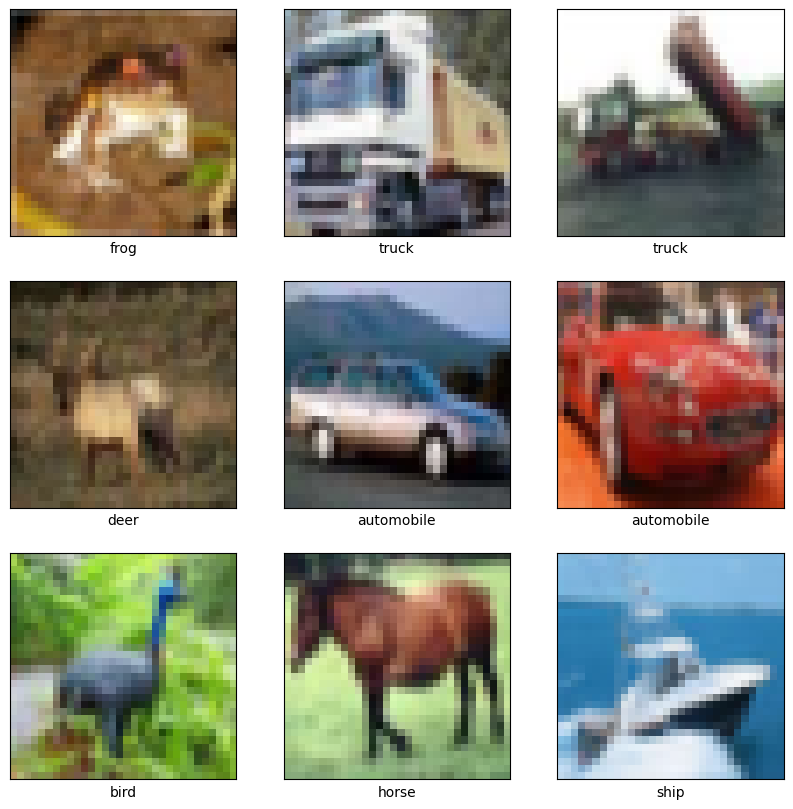

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 531s 337ms/step - accuracy: 0.2864 - loss: 1.9316 - val_accuracy: 0.5741 - val_loss: 1.1851
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 521s 333ms/step - accuracy: 0.5962 - loss: 1.1263 - val_accuracy: 0.6566 - val_loss: 0.9778
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 575s 342ms/step - accuracy: 0.6853 - loss: 0.8786 - val_accuracy: 0.6825 - val_loss: 0.9446
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 559s 340ms/step - accuracy: 0.7450 - loss: 0.7132 - val_accuracy: 0.7225 - val_loss: 0.8287
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 529s 338ms/step - accuracy: 0.7896 - loss: 0.5953 - val_accuracy: 0.7307 - val_loss: 0.7871
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 560s 337ms/step - accuracy: 0.8258 - loss: 0.4943 - val_accuracy: 0.7291 - val_loss: 0.8389
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 566s 339ms/step - accuracy: 0.8596 - loss: 0.4027 - val_accuracy: 0.7299 - val_loss: 0.8718
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 559s 338ms/step - ac

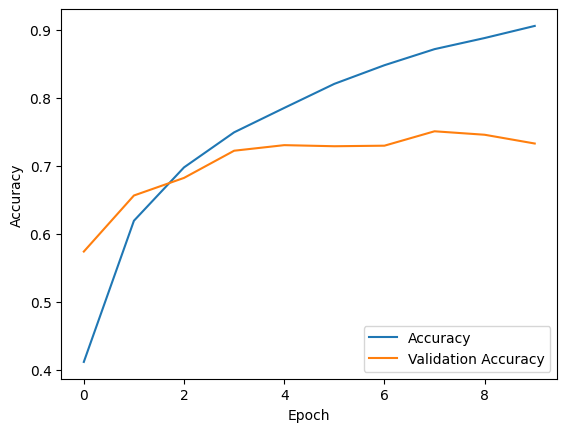

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Classes in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
